### 第4章 NumPy基础：数组与向量化计算

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 26 ms


In [4]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 1.33 s


In [5]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

#### 使用astype总是生成一个新数组，即使你传入的dtype与之前一样

In [6]:
arr = arr.astype("float64")
arr

array([1., 2., 3., 4., 5.])

In [7]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.dtype

dtype('float64')

In [8]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [9]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [10]:
np.empty(8, dtype="u4")

array([4259932, 7340144, 6357060, 6357108, 5374044, 6357103, 6881389,
       6750318], dtype=uint32)

In [11]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [12]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [13]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [14]:
arr2 = np.array([[1], [3]])
arr + arr2

array([[2., 3., 4.],
       [7., 8., 9.]])

In [15]:
arr3 = np.array([1, 2, 3])
arr + arr3

array([[2., 4., 6.],
       [5., 7., 9.]])

In [16]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 数组的切片是原数组的视图，这意味着数据并不是被复制了，任何对于视图的修改都会反映到原数组上。

In [17]:
arr[5]

5

In [18]:
arr[5:8]

array([5, 6, 7])

In [19]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [20]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [21]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [22]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [23]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [24]:
arr2d[0][2]

3

In [25]:
arr2d[0, 2]

3

In [26]:
arr3d = [[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]
arr3d

[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]

In [27]:
arr3d[0]

[[1, 2, 3], [4, 5, 6]]

In [28]:
old_values = arr3d[0].copy()

#### 注意，书中最后的结果是[[[42, 42, 42], [42, 42, 42]], [[7, 8, 9], [10, 11, 12]]]

In [29]:
arr3d[0] = 42

In [30]:
arr3d

[42, [[7, 8, 9], [10, 11, 12]]]

In [31]:
arr3d[0] = old_values
arr3d

[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]

In [32]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [34]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [35]:
arr2d[1, :2]

array([4, 5])

In [36]:
arr2d[:2, 2]

array([3, 6])

In [37]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [38]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [39]:
data

array([[-0.48404725, -0.3776983 , -0.10880683, -0.04063943],
       [ 1.07390027,  3.1895384 ,  0.91393171,  0.81424357],
       [ 0.07381651, -0.05280166,  1.08474135, -0.33993883],
       [-0.52281134,  2.71389909,  0.19693525, -1.15229834],
       [-0.65863205, -0.76073433,  0.52105783, -0.44459511],
       [ 0.21734031, -0.1232628 , -0.58800939, -1.33243662],
       [ 0.84935409, -0.7894566 ,  1.38477114, -1.8910187 ]])

#### 布尔值数组的长度必须和数组轴索引长度一致

In [40]:
data[names == "Bob"]

array([[-0.48404725, -0.3776983 , -0.10880683, -0.04063943],
       [-0.52281134,  2.71389909,  0.19693525, -1.15229834]])

In [41]:
data[[True, False, True]]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 3

In [42]:
data[names == "Bob", 2:]

array([[-0.10880683, -0.04063943],
       [ 0.19693525, -1.15229834]])

#### Python的and和or在Numpy中不适用，使用&(与)，|(或)，~(取反)

In [43]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [44]:
data[mask]

array([[-0.48404725, -0.3776983 , -0.10880683, -0.04063943],
       [ 0.07381651, -0.05280166,  1.08474135, -0.33993883],
       [-0.52281134,  2.71389909,  0.19693525, -1.15229834],
       [-0.65863205, -0.76073433,  0.52105783, -0.44459511]])

#### 使布尔值索引选择数据时，总是生成数据的拷贝，即时返回的数组并没有任何变化。

In [45]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.        , 0.        ],
       [1.07390027, 3.1895384 , 0.91393171, 0.81424357],
       [0.07381651, 0.        , 1.08474135, 0.        ],
       [0.        , 2.71389909, 0.19693525, 0.        ],
       [0.        , 0.        , 0.52105783, 0.        ],
       [0.21734031, 0.        , 0.        , 0.        ],
       [0.84935409, 0.        , 1.38477114, 0.        ]])

In [46]:
data[names != "Joe"] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [1.07390027, 3.1895384 , 0.91393171, 0.81424357],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.21734031, 0.        , 0.        , 0.        ],
       [0.84935409, 0.        , 1.38477114, 0.        ]])

In [47]:
arr = np.empty((8, 4))
arr

array([[3.62651200e-317, 1.01957288e-311, 7.04236887e-313,
        1.69484279e-319],
       [7.04236885e-313, 0.00000000e+000, 1.01957922e-311,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.01957906e-311,
        4.94065646e-324],
       [6.95172447e-310, 2.02369289e-320, 4.94065646e-324,
        6.95172469e-310],
       [9.88131292e-324, 0.00000000e+000, 0.00000000e+000,
        3.56043053e-307],
       [1.60219306e-306, 7.56571288e-307, 1.89146896e-307,
        1.37961302e-306],
       [1.05699242e-307, 8.01097889e-307, 2.22522868e-306,
        1.33511562e-306],
       [1.24611402e-306, 1.24611538e-306, 2.13623116e-306,
        8.34423917e-308]])

In [48]:
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [49]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [50]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [51]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [52]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [53]:
arr = np.random.randn(7) * 5
arr

array([-7.38061722,  0.12398073,  2.93202861, -1.87040012,  2.45501237,
       -7.45721785, -3.39308454])

In [54]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.38061722,  0.12398073,  0.93202861, -0.87040012,  0.45501237,
       -0.45721785, -0.39308454])

In [55]:
whole_part

array([-7.,  0.,  2., -1.,  2., -7., -3.])

In [56]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [57]:
import matplotlib.pyplot as plt

In [58]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

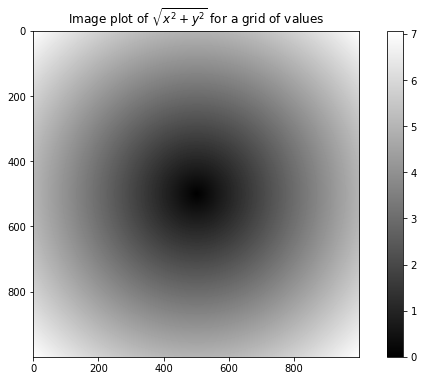

In [59]:
plt.figure(figsize=(10, 6))
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [60]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [61]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [62]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [63]:
np.where(cond, 1, 2)

array([1, 2, 1, 1, 2])

In [64]:
rd = np.random.randn(5, 6)
rd

array([[ 1.40893987,  0.4412841 ,  1.34743323,  0.76820044,  1.65875077,
        -1.10246901],
       [ 2.68266418,  0.90418272,  0.74830219, -0.72574993,  1.36553587,
        -0.73487177],
       [-0.79491965,  0.79406051, -0.30935242, -1.62380416, -1.10568984,
         1.45891045],
       [ 0.96584349, -1.68866561,  0.2460171 , -0.59874982,  1.34786216,
         0.29875968],
       [ 0.92791734, -1.01804684,  1.25615456, -0.70281484, -1.31629372,
        -2.51914161]])

In [65]:
np.where(rd > 0, 2, rd)

array([[ 2.        ,  2.        ,  2.        ,  2.        ,  2.        ,
        -1.10246901],
       [ 2.        ,  2.        ,  2.        , -0.72574993,  2.        ,
        -0.73487177],
       [-0.79491965,  2.        , -0.30935242, -1.62380416, -1.10568984,
         2.        ],
       [ 2.        , -1.68866561,  2.        , -0.59874982,  2.        ,
         2.        ],
       [ 2.        , -1.01804684,  2.        , -0.70281484, -1.31629372,
        -2.51914161]])

In [66]:
arr = np.random.randn(5, 4)
arr

array([[-2.44578078e+00, -6.13691550e-01, -3.82868572e-01,
         2.66655214e-01],
       [-1.42384059e+00,  1.18315494e+00,  7.08579002e-02,
         7.06029014e-01],
       [ 8.74978144e-01, -2.13663166e-03,  6.58232477e-01,
         6.18763868e-01],
       [-3.14703556e-01,  2.82998334e+00, -2.08188282e+00,
         3.95421948e-01],
       [ 7.85138968e-01,  5.14978483e-01,  1.37602299e+00,
        -1.62791890e-01]])

In [67]:
arr.mean()

0.1426260443836834

In [68]:
np.mean(arr)

0.1426260443836834

In [69]:
arr.sum()

2.852520887673668

In [70]:
arr.sum(axis=1)

array([-3.17568569,  0.53620126,  2.14983786,  0.82881891,  2.51334855])

In [71]:
sum([-1.29071382, -0.78015998,  0.49035065,  0.14946175])

-1.4310614

In [72]:
arr.sum(axis=0)

array([-2.52420782,  3.91228858, -0.35963802,  1.82407815])

#### sum可以用来计算布尔值数组中的True的个数

In [73]:
data = np.random.randn(5, 4)
data

array([[-0.1821354 ,  0.75068498,  0.6921956 ,  2.69637983],
       [ 0.13975782, -0.16776303,  0.91603658,  2.23058804],
       [-0.22539346, -0.64577368,  0.41026125,  1.27759118],
       [-0.49093487,  1.04302328,  0.96354746, -0.10116973],
       [-0.94187389, -1.15847939,  0.98887969,  1.21154105]])

In [74]:
(data > 0).sum()

12

In [75]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [76]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [77]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

In [78]:
np.random.randint(5, 10, 6)

array([8, 7, 5, 8, 8, 5])

In [79]:
np.random.rand(3, 2)

array([[0.08101327, 0.87266482],
       [0.61638106, 0.94733504],
       [0.08237406, 0.98873023]])

In [80]:
np.random.randn(3, 2)

array([[ 1.74643421,  0.95587643],
       [-0.11983613,  0.54630181],
       [-1.38221894, -0.82290168]])

In [81]:
np.random.normal(3, 1, size=(2, 4))

array([[2.88530284, 4.58606591, 3.73002689, 2.77058961],
       [3.38640046, 3.63241208, 2.42152493, 2.11581229]])

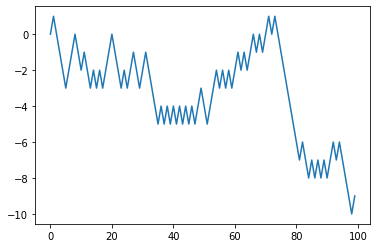

In [82]:
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

In [83]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [84]:
walk.min()

-57

In [85]:
walk.max()

19

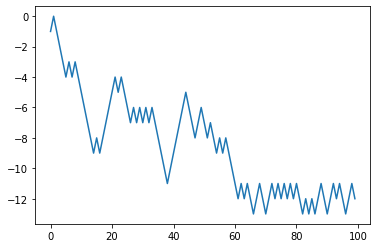

In [86]:
plt.plot(walk[:100])